In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:

# It returns all list of individual words of the document text.
def get_individual_words(document_text):
    full_text=document_text
    full_text=full_text.strip()
    full_text=full_text.replace("\n", ",")
    full_text=full_text.replace("\t", ",")
    full_text=full_text.replace(":", ",")
    full_text=full_text.replace(";", ",")
    full_text=full_text.replace(" ", ",")
    full_text=full_text.replace(" ", ",")
    full_text=full_text.replace("-", ",")
    full_text=full_text.replace("*", ",")
    full_text=full_text.replace("&", ",")
    full_text=full_text.replace("+", ",")
    full_text=full_text.replace("$", ",")
    full_text=full_text.replace("/", ",")
    full_text=full_text.replace("%", ",")

    full_text=full_text.lower()
    full_words=full_text.split(',')
    
    return full_words;

# it returns the documents and it's labels from corpus 
def get_documents_labels(file_path):
    
    file1 = open(file_path, 'r')
    Lines = file1.readlines()
    
    documents=[]
    labels=[]
    for line in Lines:
        temp=line.split('\t')
        #print(temp)
        documents.append(temp[0])
        if(temp[1]=='0\n'):
            labels.append(0)
        elif(temp[1]=='1\n'):
            labels.append(1)
    return documents,labels

# It returns list of all the words of the documents with repeatation.
def get_all_words_of_documents(documents):
    full_text=''
    
    for i in documents:
        full_text=full_text+" "+i
        
    full_words=get_individual_words(full_text)
    
    for i in range(len(full_words)):
        full_words[i]=full_words[i].lower()
    
    
    full_words_updated=[]
    for individual_word in full_words:
        if(len(individual_word)!=0 and individual_word!=' '):
            full_words_updated.append(individual_word)
    return full_words_updated;





In [3]:
# It returns the term frequnecy of the term_t in the document_text
def tf(term_t,document_text):
    term_t=term_t.lower()
    full_words=get_individual_words(document_text)
    #print(full_words)
    term_t_count=0
    if(term_t in full_words):
        for i in full_words:
           if(i==term_t):
               term_t_count=term_t_count+1
    #print(term_t_count,len(full_words))
    return term_t_count/len(full_words)



import math

# it returns the tf-idf of the term_t of the document_text.
def tf_idf_single_term(term_t,document_text):
    term_t=term_t.lower()
    index=term_dictionary[term_t]
    term_freq=tf(term_t,document_text)
    document_freq=Document_Frequency[index]
    #print(term_freq,document_freq)
    if(document_freq>0):
        return term_freq*math.log(total_words_N/document_freq)
    else:
        return term_freq*math.log(total_words_N/1+document_freq)
    

# it returns the tf-idf of the document_text.
# it will be used to represent the document as a feature vector.
def tf_idf(document_text):
    feature_vector=np.zeros(total_unique_words_V,)
    for i in range(len(dictionary)):
        feature_vector[i]=tf_idf_single_term(dictionary[i],document_text)
    return feature_vector

# Corpus reading

In [4]:
file_path='movie_reviews/movieReviews1000.txt'

# reading a documents and labels from the corpus (text file) 
documents,labels=get_documents_labels(file_path)

# full words of all the documents with repeatation. 
full_words=get_all_words_of_documents(documents)

dictionary = list(set(full_words))
dictionary.sort()

In [5]:
total_unique_words_V=len(dictionary)
total_words_N=len(full_words)
total_documents_D=len(documents)

# Corpus Details:

In [6]:
print('total no of documents:',total_documents_D)
print('total no of words in the documents(N):',total_words_N)
print('total no of unique words(V):',total_unique_words_V)

total no of documents: 1000
total no of words in the documents(N): 14436
total no of unique words(V): 3139


making a term dictionary

In [7]:
#making a term dictionary

term_dictionary={}
for i in range(len(dictionary)):
    term_dictionary[dictionary[i]]=i

print term-frequency of the slow word in the following sentence.

In [8]:
#print term-frequency of the slow word in the following sentence.

print(documents[0])
print("term-frequency of word slow:",tf("slow",documents[0]))


A very very very slow-moving aimless movie about a distressed drifting young man  
term-frequency of word slow: 0.07142857142857142


# Term Frequency Calculation Table:    

Term-Frequency(t,d): $\frac{Total no of times t occured in document t}{Total no of words in the document t}$

In [9]:
Term_Frequecy=np.zeros((total_unique_words_V,total_documents_D),dtype='float64')

for i in range(len(dictionary)):
    for j in range(len(documents)):
        Term_Frequecy[i][j]=tf(dictionary[i],documents[j])

print("Term_Frequecy calculation was completed---------------------")

Term_Frequecy calculation was completed---------------------


# Document Frequecny calculation:

$Document-Frequency(t)$=<i>total no of documents containg t</i>

In [10]:
#document frequecny calculations
# execution is only once for code.............. 

       
Document_Frequency=np.zeros(total_unique_words_V)

for i in range(len(dictionary)):
    temp=Term_Frequecy[i,:]
    document_indices=np.where(temp>0)
    document_indices=np.array(document_indices)
    Document_Frequency[i]=document_indices.shape[1]

print("Document Frequency calculation was completed---------------------")

Document Frequency calculation was completed---------------------


# tf-idf of document calculation:

In [11]:
document_id=np.random.randint(1,1000)
document_vector=tf_idf(documents[document_id])

print('Document text:\n',documents[document_id])
print('tf-idf array:\n',document_vector )

print("Following elements of document vectors are greater than zero:\n")
indices=np.where(document_vector>0)
print("index-----tf-idf")
for i  in indices[0]:
    print(i,"-----",document_vector[i])

Document text:
 Think of the film being like a dream  
tf-idf array:
 [0. 0. 0. ... 0. 0. 0.]
Following elements of document vectors are greater than zero:

index-----tf-idf
44 ----- 0.4689350322977786
284 ----- 0.8865717144968348
811 ----- 1.1971850457203348
1045 ----- 0.5691999806145503
1616 ----- 0.7241613414805522
1897 ----- 0.48132907727193525
2712 ----- 0.41763884694487186
2732 ----- 0.816619741004907


# Representing the Corpus into feature vector:

We are representing the corpus as a feature vector.

make a feature vector for every document and form a array with these feature vectors.


In [12]:
document_vector=[]

for i in documents:
    document_vector.append(tf_idf(i))

document_vector=np.array(document_vector)
document_vector.shape


(1000, 3139)

Since, the number of the documents is:1000 and number of the unique words is: 3139.

Corpus will be represented as a array of : $1000 \times 3139$ .



In [14]:
def higher_dimension_PCA(X):
    # Data Centering
    X_mean=np.mean(X,axis=0)
    X_centered=X-X_mean
    
    #checking the mean of the centered Data.
    #print(np.mean(X_centered,axis=0))
    #print(np.sum(np.mean(X_centered,axis=0)))

    # we are calculating the eigen values of the X@XT for calculating the eigen values of the XT@X
    
    temp_outer_product=(1/N)*(X_centered@X_centered.T)
    temp_eigen_values,temp_eigen_vectors=np.linalg.eigh(temp_outer_product)
    
    idx = np.argsort(-temp_eigen_values)
    temp_eigen_values = temp_eigen_values[idx]
    temp_eigen_vectors = temp_eigen_vectors[:,idx]
        
    
    #print(temp_eigen_values.shape)
    #print(temp_eigen_vectors.shape)
    
    
    # For calculating the eigenvalues of the XT@X
    
    #print(temp_eigen_values)
    norms_of_eigen_vectors=np.sqrt(N*temp_eigen_values)
    eigen_vectors=X_centered.T@temp_eigen_vectors
    
    for i in range(eigen_vectors.shape[1]):
        eigen_vectors[:,i]=eigen_vectors[:,i]/norms_of_eigen_vectors[i]
    
    print('Eigen vectors shape',eigen_vectors.shape)

    return eigen_vectors

In [13]:
def data_centering(X):
    X_mean=np.mean(X,axis=0)
    X_centered=X-X_mean
    return X_centered 

In [14]:
from sklearn.decomposition import PCA

K=10
document_vector_centered=data_centering(document_vector)
print('Data_shape',document_vector_centered.shape)
pca = PCA(n_components = K)
projected_data = pca.fit_transform(document_vector_centered)
print('Projected data shape:',projected_data.shape)

Data_shape (1000, 3139)
Projected data shape: (1000, 10)


In [15]:
from sklearn.cluster import KMeans




def multivariate_normal(X, mean_vector, covariance_matrix):
    D=X.shape[0]
    exponent=0.5*(X-mean_vector).T@np.linalg.inv(covariance_matrix)@(X-mean_vector)
    denominator=((2*np.pi)**D)*np.linalg.det(covariance_matrix)
    denominator=np.sqrt(denominator)
    value=np.exp(-exponent)/denominator
    return value

def random_sampling(X,X_labels,total_no_samples):
    list_indices=list(range(total_no_samples))
    np.random.shuffle(list_indices)	
    return X[list_indices],X_labels[list_indices]

def get_log_likelihood(X,gmm_means,gmm_cov_matrix,theta):
    log_likelihood=0
    total_no_points=X.shape[0]
    no_components=gmm_means.shape[0]
    
    #print('total_no_points',total_no_points,'no_components',no_components)
    for i in range(total_no_points):
        mixed_guassian_sum=0
        for cluster_yi in range(no_components):
            likelihood=multivariate_normal(X[i],gmm_means[cluster_yi],gmm_cov_matrix[cluster_yi])
            mixed_guassian_sum=mixed_guassian_sum+likelihood*theta[cluster_yi]
        log_likelihood=log_likelihood+np.log(mixed_guassian_sum)
    return log_likelihood


def get_updated_cov_matrix(X,r,means_updated,cov_matrix_type):
    #print("updating the cov matrix")
    total_no_points=X.shape[0]
    D=X.shape[1]
    no_components=r.shape[1]
    
    # updating the covariance matrices..................
    gmm_cov_matrix_updated=np.zeros(shape=(no_components,D,D))
    
    if(cov_matrix_type=='FULL'):
        for cluster_yi in range(no_components):
            temp_cov_matix=np.zeros(shape=(D,D))
            for i in range(total_no_points):
                x_i=X[i]
                temp_cov_matix=temp_cov_matix+r[i,cluster_yi]*np.outer(x_i-means_updated[cluster_yi],x_i-means_updated[cluster_yi])
            temp_cov_matix=temp_cov_matix/np.sum(r[:,cluster_yi])
            gmm_cov_matrix_updated[cluster_yi]=temp_cov_matix    
    elif(cov_matrix_type=='DIAG'):
        for cluster_yi in range(no_components):
            temp_cov_matix=np.zeros(shape=(D,D))
            for i in range(total_no_points):
                x_i=X[i]
                temp_cov_matix=temp_cov_matix+r[i,cluster_yi]*np.outer(x_i-means_updated[cluster_yi],x_i-means_updated[cluster_yi])
            temp_cov_matix=np.diag(np.diag(temp_cov_matix))
            temp_cov_matix=temp_cov_matix/np.sum(r[:,cluster_yi])
            gmm_cov_matrix_updated[cluster_yi]=temp_cov_matix 
    elif(cov_matrix_type=='IDENTITY'):
        for cluster_yi in range(no_components):
            gmm_cov_matrix_updated[cluster_yi]=np.eye(D) 
        
    return gmm_cov_matrix_updated

In [16]:
def init_parameters_for_GMM(X,no_components):

    new_X = np.array_split(projected_data, 2)
    mean_vector = [np.mean(x, axis=0) for x in new_X]
    covariance_matrixes = [np.cov(x.T) for x in new_X]

    mean_vector=np.array(mean_vector)
    covariance_matrixes=np.array(covariance_matrixes)
    #init the probabilites
    theta=1/no_components*np.ones(shape=(no_components,1)) 

    return mean_vector,covariance_matrixes,theta

def Expectation_Maximization_Updated(X,no_components,no_iterations,cov_matrix_type):
    
    # we are initilizing the parameters using K-means
    inital_means,gmm_cov_matrix,theta=init_parameters_for_GMM(X,no_components)
    
    print('get_log_likelihood',get_log_likelihood(X,inital_means,gmm_cov_matrix,theta))
    
    log_likelihood=[]
    
    for iteration in range(no_iterations):
        total_no_points=X.shape[0]
        D=X.shape[1]
        
        # storing the posterior-probabilities...
        r=np.zeros(shape=(total_no_points,no_components),dtype='float64')
        
        cluster_yi=1
        for i in range(total_no_points):
            dec_sum=0
            for cluster_yi in range(no_components):
                temp=multivariate_normal(X[i],inital_means[cluster_yi],gmm_cov_matrix[cluster_yi])
                r[i][cluster_yi]=temp*theta[cluster_yi]
                dec_sum=dec_sum+r[i][cluster_yi]
            r[i,:]=r[i,:]/dec_sum
        print('Posterior calculation completed-------')
        
        # M-step updating the mean and Covariance-matirces....................
        
        # updating the probabilities.........................
        
        theta_updated=np.zeros_like(theta)
        
        theta_updated=(1/total_no_points)*np.sum(r,axis=0)
        
        #updating the means........................
        means_updated=np.zeros_like(inital_means)
        
        for cluster_yi in range(no_components):
            #print("X:shape",X.shape)
            #print("r shape",r[:,index].shape)
            means_updated[cluster_yi]=X.T@r[:,cluster_yi]/np.sum(r[:,cluster_yi])
            #print("Mean:"+str(i),means_updated[index])    
            
            
        # updating the covariance matrices..................
        gmm_cov_matrix_updated=get_updated_cov_matrix(X,r,means_updated,cov_matrix_type)
                       
        inital_means=means_updated
        gmm_cov_matrix=gmm_cov_matrix_updated
        theta=theta_updated
        
        
        print("iteration: "+str(iteration)+" completed.")
        log_likelihood_value=get_log_likelihood(X,inital_means,gmm_cov_matrix,theta)
        print('get_log_likelihood',log_likelihood_value)
        log_likelihood.append(log_likelihood_value)

    log_likelihood=np.array(log_likelihood)
    return inital_means,gmm_cov_matrix,theta,log_likelihood

In [17]:
def GMM_Sentiment_Model(positive_data,negative_data,no_components,no_iterations,cov_matrix_type):
    
    gmm_positive_parameters=Expectation_Maximization_Updated(positive_data,no_components,no_iterations,cov_matrix_type)
    gmm_negative_parameters=Expectation_Maximization_Updated(negative_data,no_components,no_iterations,cov_matrix_type)
    
    return gmm_positive_parameters,gmm_negative_parameters

In [18]:
# separating the postive data and negative data.

labels=np.array(labels)
positive_indices=np.where(labels==1)
negative_indices=np.where(labels==0)
positive_data=projected_data[positive_indices]
negative_data=projected_data[negative_indices]
no_postive_samples=positive_data.shape[0]
no_negative_samples=negative_data.shape[0]

postive_labels=np.ones(shape=(no_postive_samples,1))
negative_labels=np.zeros(shape=(no_negative_samples,1))

In [19]:
def plot_log_likelihood_sum(music_log_likelihood_sum,speech_log_likelihood_sum):
    fig=plt.figure(figsize=(10,10))

    plot=fig.add_subplot(1,2,1)
    
    plt.plot(music_log_likelihood_sum,'r')
    plot.set_title('loglikelihood_positive')
    
    plot=fig.add_subplot(1,2,2)
    plot.set_title('loglikelihood_negative')
    plt.plot(speech_log_likelihood_sum,'g')

Text(0.5, 1.0, 'review data initially')

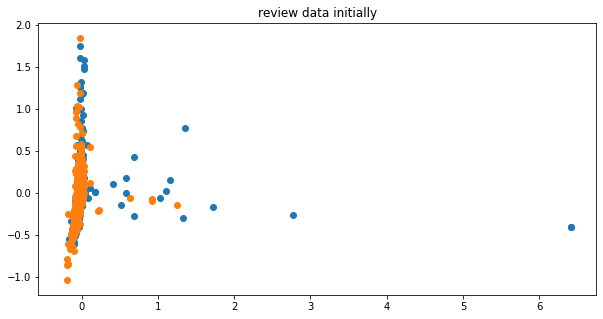

In [23]:
document_vector_centered=data_centering(document_vector)

pca = PCA(n_components = 2)
two_dim_data = pca.fit_transform(document_vector_centered)

plt.figure(figsize=(10,5))
plt.scatter(two_dim_data[:,0][positive_indices],two_dim_data[:,1][positive_indices])
plt.scatter(two_dim_data[:,0][negative_indices],two_dim_data[:,1][negative_indices])
plt.title('review data initially')

In [24]:
def get_likelihood(test_X,gmm_parameters):
    gmm_means_01,gmm_cov_matrix_01,theta_01,log_likelihood_01=gmm_parameters
    total_samples=test_X.shape[0]
    no_components=theta_01.shape[0]
    
    
    likelihood_table=np.zeros(shape=(total_samples,no_components))

    #print(total_samples,no_components)
 
    for i in range(total_samples):
        for cluster_yi in range(no_components):
            x_i=test_X[i]
            likelihood_table[i][cluster_yi]=multivariate_normal(x_i,gmm_means_01[cluster_yi],gmm_cov_matrix_01[cluster_yi])
            
    likelihood_table=likelihood_table@theta_01
    #print(likelihood_table.shape)
    return likelihood_table.reshape(-1,1)



def sentiment_classifier(projected_data,gmm_positive_parameters,gmm_negative_parameters):
 
    positve_likelihood=get_likelihood(projected_data,gmm_positive_parameters)
    negative_likelihood=get_likelihood(projected_data,gmm_negative_parameters)
    
    temp=np.hstack([negative_likelihood,positve_likelihood])
    
    calculated_labels=np.argmax(temp, axis=1)

    return calculated_labels


In [25]:
def Expectation_Maximization(X,no_components,no_iterations,cov_matrix_type):
    
    parameters=[]
    # we are initilizing the parameters using K-means
    inital_means,gmm_cov_matrix,theta=init_parameters_for_GMM(X,no_components)
    
    print('get_log_likelihood',get_log_likelihood(X,inital_means,gmm_cov_matrix,theta))
    
    log_likelihood=[]
    
    for iteration in range(no_iterations):
        total_no_points=X.shape[0]
        D=X.shape[1]
        
        # storing the posterior-probabilities...
        r=np.zeros(shape=(total_no_points,no_components),dtype='float64')
        
        cluster_yi=1
        for i in range(total_no_points):
            dec_sum=0
            for cluster_yi in range(no_components):
                temp=multivariate_normal(X[i],inital_means[cluster_yi],gmm_cov_matrix[cluster_yi])
                r[i][cluster_yi]=temp*theta[cluster_yi]
                dec_sum=dec_sum+r[i][cluster_yi]
            r[i,:]=r[i,:]/dec_sum
        print('Posterior calculation completed-------')
        
        # M-step updating the mean and Covariance-matirces....................
        
        # updating the probabilities.........................
        
        theta_updated=np.zeros_like(theta)
        
        theta_updated=(1/total_no_points)*np.sum(r,axis=0)
        
        #updating the means........................
        means_updated=np.zeros_like(inital_means)
        
        for cluster_yi in range(no_components):
            #print("X:shape",X.shape)
            #print("r shape",r[:,index].shape)
            means_updated[cluster_yi]=X.T@r[:,cluster_yi]/np.sum(r[:,cluster_yi])
            #print("Mean:"+str(i),means_updated[index])    
            
            
        # updating the covariance matrices..................
        gmm_cov_matrix_updated=get_updated_cov_matrix(X,r,means_updated,cov_matrix_type)
                       
        inital_means=means_updated
        gmm_cov_matrix=gmm_cov_matrix_updated
        theta=theta_updated
        
        
        print("iteration: "+str(iteration)+" completed.")
        log_likelihood_value=get_log_likelihood(X,inital_means,gmm_cov_matrix,theta)
        print('get_log_likelihood',log_likelihood_value)
        log_likelihood.append(log_likelihood_value)
        parameters.append([inital_means,gmm_cov_matrix,theta,log_likelihood_value])

    log_likelihood=np.array(log_likelihood)
    return parameters


In [26]:
gmm_parameters=Expectation_Maximization_Updated(projected_data,2,30,'DIAG')

get_log_likelihood [2250.0977149]
Posterior calculation completed-------
iteration: 0 completed.
get_log_likelihood 3389.8023837943183
Posterior calculation completed-------
iteration: 1 completed.
get_log_likelihood 5643.8703110326205
Posterior calculation completed-------
iteration: 2 completed.
get_log_likelihood 6017.2470776596365
Posterior calculation completed-------
iteration: 3 completed.
get_log_likelihood 6057.169215798919
Posterior calculation completed-------
iteration: 4 completed.
get_log_likelihood 6069.979716248172
Posterior calculation completed-------
iteration: 5 completed.
get_log_likelihood 6073.384517108467
Posterior calculation completed-------
iteration: 6 completed.
get_log_likelihood 6074.230681890864
Posterior calculation completed-------
iteration: 7 completed.
get_log_likelihood 6074.46413282525
Posterior calculation completed-------
iteration: 8 completed.
get_log_likelihood 6074.529973733465
Posterior calculation completed-------
iteration: 9 completed.
g

Text(0, 0.5, 'log-likelihood sum')

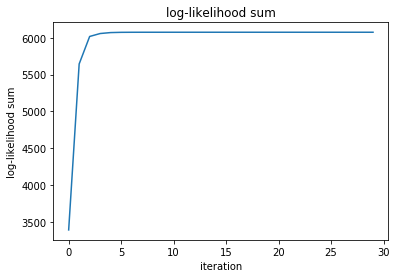

In [32]:
plt.plot(gmm_parameters[3])
plt.title('log-likelihood sum')
plt.xlabel('iteration')
plt.ylabel('log-likelihood sum')

get_log_likelihood [1557.28628426]
Posterior calculation completed-------
iteration: 0 completed.
get_log_likelihood 3393.882436231508
Posterior calculation completed-------
iteration: 1 completed.
get_log_likelihood 3844.741825032239
Posterior calculation completed-------
iteration: 2 completed.
get_log_likelihood 3884.620599194271
Posterior calculation completed-------
iteration: 3 completed.
get_log_likelihood 3903.344319972882
Posterior calculation completed-------
iteration: 4 completed.
get_log_likelihood 3915.662273682217
Posterior calculation completed-------
iteration: 5 completed.
get_log_likelihood 3918.2166648349234
Posterior calculation completed-------
iteration: 6 completed.
get_log_likelihood 3919.4454993632257
Posterior calculation completed-------
iteration: 7 completed.
get_log_likelihood 3920.033299463052
Posterior calculation completed-------
iteration: 8 completed.
get_log_likelihood 3920.317633196484
Posterior calculation completed-------
iteration: 9 completed.


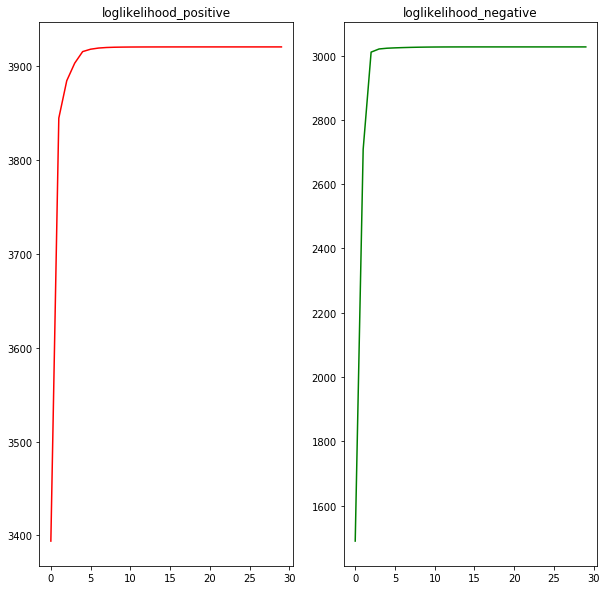

In [33]:
gmm_positive_parameters_01,gmm_negative_parameters_01=GMM_Sentiment_Model(positive_data,negative_data,2,30,'DIAG')


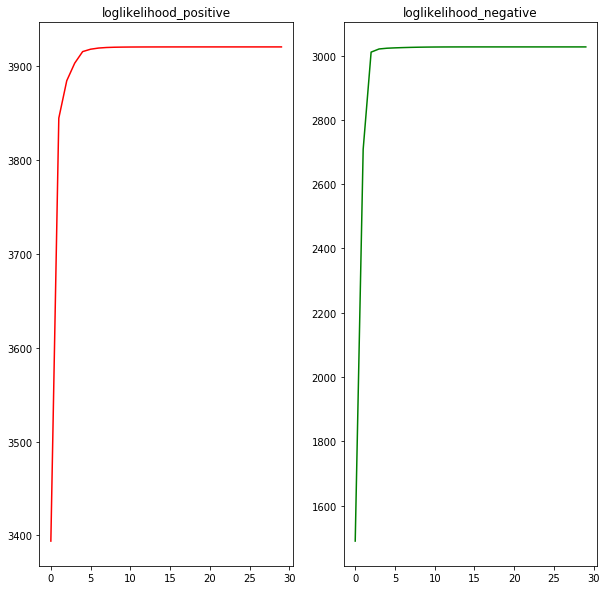

In [34]:
plot_log_likelihood_sum(gmm_positive_parameters_01[3],gmm_negative_parameters_01[3])

In [36]:
gmm_positive_parameters=Expectation_Maximization(positive_data,2,30,'DIAG')
gmm_negative_parameters=Expectation_Maximization(positive_data,2,30,'DIAG')

get_log_likelihood [1557.28628426]
Posterior calculation completed-------
iteration: 0 completed.
get_log_likelihood 3393.882436231508
Posterior calculation completed-------
iteration: 1 completed.
get_log_likelihood 3844.741825032239
Posterior calculation completed-------
iteration: 2 completed.
get_log_likelihood 3884.620599194271
Posterior calculation completed-------
iteration: 3 completed.
get_log_likelihood 3903.344319972882
Posterior calculation completed-------
iteration: 4 completed.
get_log_likelihood 3915.662273682217
Posterior calculation completed-------
iteration: 5 completed.
get_log_likelihood 3918.2166648349234
Posterior calculation completed-------
iteration: 6 completed.
get_log_likelihood 3919.4454993632257
Posterior calculation completed-------
iteration: 7 completed.
get_log_likelihood 3920.033299463052
Posterior calculation completed-------
iteration: 8 completed.
get_log_likelihood 3920.317633196484
Posterior calculation completed-------
iteration: 9 completed.


In [38]:
index=5
sentiment_classifier(projected_data,gmm_positive_parameters[index],gmm_negative_parameters[index])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,